In [416]:
props=list()
propDict={'Price':'','Location':'','Bedrooms':'','Area':''}
lastCopy=propDict.copy()
countDec=0
tempCount=[]
tempBath=[]
tempBath2=[]
#finList=[]

import requests
import re
from bs4 import BeautifulSoup

for i in range(0,3000,120):
    
    res=requests.get(f'https://sfbay.craigslist.org/search/apa?s={i}')
    soup=BeautifulSoup(res.text,'html.parser')
    finList=[]
    tempPrime=[]
    
    for count,tempStr in enumerate(soup.select('.result-info')):
        temp=[]
        temp=re.findall('[\d]+ft',str(tempStr))
        if temp!=[]:
            propDict.update({'Area':int(temp[0].replace('ft',''))})
        else:  
            propDict['Area']='None'
            
############################################################################## 

        tempPrime=[]
    
        matPatrn='[a-zA-Z]*\s*studio\s*[a-zA-Z]*'
        tempPrime=re.findall(matPatrn,str(tempStr).lower(),flags=re.IGNORECASE)
        
        removWordsPrime=['estudio','estudio de','from studio']
        
        if tempPrime!=[] and tempPrime not in removWordsPrime:
            propDict['Is Studio']='Yes'
        else:
            propDict['Is Studio']='NA'
            
############################################################################
        matPatrn='[a-zA-Z0-9]*\s*patio\s*[a-zA-Z0-9]*'
    
        takeWords={'private':'Has a Private patio','Private':'Has a Private patio',
                   'Large':'Has a Large patio','enclosed':'Has a Enclosed Patio',
                   'large':'Has a Large Patio',
                   'Spacious':'Has a Spacious patio'}
        
        tempPrime=[]
        tempPrime=re.findall(matPatrn,str(tempStr).lower(),flags=re.IGNORECASE)
        
        if tempPrime!=[]:
            flag=0
            for j in tempPrime:
                tempLst=[]
                tempLst=j.split(' ')
                for idx in tempLst:
                    idx=idx.replace(' ','')
                    for idx2 in takeWords.keys():
                        if idx2==idx:
                            propDict['Patio']=takeWords[idx2]
                            flag=1
                            break
                    break      
            if flag!=1:
                propDict['Patio']='Has Patio'
        else:
            propDict['Patio']='NA'
            
################################################################################ 

        initMatPatrn='WE ♥ PETS|pets are [a-z,A-Z]+|Pets are [a-z,A-Z]+|Pets [a-z,A-Z]+|pets [a-z,A-Z]+|Pet [a-z,A-Z]+|pet [a-z,A-Z]+'

        temp4=[]
        temp4=re.findall(initMatPatrn,str(tempStr))
        
        if temp4!=[]:
            if temp4[0]=='peting' or temp4[0]=='petaluma' :
                propDict['Pet friendly']='NA'
            else:
                if 'Pet Deposit,' not in temp4:
                    propDict['Pet friendly']='Yes' 
        else:
            propDict['Pet friendly']='NA'

################################################################################

        temp1=[]
    
        temp1=re.findall('"result-price">\S*(\$[\d]+)',str(tempStr))
        if temp1!=[]:
            temp2=temp1[0].strip('$')
            propDict.update({'Price':int(temp2)})
        else:  
            propDict['Price']='None'
            
################################################################################## 

        temp2=[]
        temp2=re.findall('<span class="result-hood">([\a-z]+)</span>\n<span class="result-tags">',str(tempStr))
        if temp2!=[]:
            temp3=temp2[0].strip('()')
            propDict.update({'Location':temp3})
        else:  
            propDict['Location']='None'
            
##################################################################################  

        temp3=[]
        matPatt='[\d]br |[\d]BR |[\d]Bedroom |[\d]bedroom |[\d] BR|[\d] br|[\d] bedroom|[\d] Bedroom'
        temp3=re.findall(matPatt,str(tempStr))
        
        if temp3!=[]:
            temp4=temp3[0].replace('br','').replace(' ','')
            if len(temp4)>2 and len(temp4)<8:
                temp4=temp3[0].replace('BR','').replace(' ','')
            if len(temp4)>=8:
                temp4=temp3[0].replace('bedroom','').replace(' ','')
            if len(temp4)>=8:
                temp4=temp3[0].replace('Bedroom','').replace(' ','')
            propDict.update({'Bedrooms':int(temp4)})
            tempCount.append(int(temp4))
        else:  
            propDict['Bedrooms']='None'
            
###################################################################################            
            
        temp4=[] 
        initMatPat=\
        '[\d] Baths|[\d] baths|[\d]Bath|[\d] BA|[\d] ba|[\d]BA|[\d]ba|[\d] baths|[\d]baths|[\d]Baths|[\d] bath|[\d]] Bath|[\d]bath|[\d]Bath|[\d]-ba|[\d]-BA|\d\.\dBath|\d\.\d Bath|\d\.\dbath|\d\.\d bath|\d\.\d BA|\d\.\d ba|\d\.\d-BA|\d\.\d-ba|\d\.\dBA|\d\.\dba'
        temp4=re.findall(initMatPat,str(tempStr))
    
        if temp4!=[]:
            temp5=temp4[0]
            matPatrn='Baths|baths|Bath|bath|ba|BA'
            tempPrime=temp5.replace(' ','').replace('-','')
            tempLst=re.sub(matPatrn,'',tempPrime)
            if float(tempLst)!=5.0:
                tempBath.append(float(tempLst))
                propDict.update({'Baths':float(tempLst)})   
        else:
            propDict['Baths']='None'
            
######################################################################################           
            
        initMatPatrn='[a-zA-z0-9]*\s*kitchen\s*[a-zA-Z0-9]*|\W*\s*kitchen\s*\W*|[a-zA-z0-9]*\-kitchen\-[a-zA-Z0-9]*|[a-zA-z0-9]*\W*kitchen\W*[a-zA-Z0-9]*'
        tempkitchen=[]
        removWords=\
        ['and','your','necessities','in','mountain','with','dryer','available','s','w','ette','studiofull', 'd','high','this','milpitas','s','in','','that','wow','Bath','dryer','WITH','','sunnyhuge','|storage|has','jacuzzi','AVAILABLE•','amp; (ingleside','S','space• has','Concept','end','patio:: has',' (ingleside','• Bright living space • Kitchen has it all']
        matPatrn='\|\+|/|\-|\d{2}|1br'  
        matPatrn2='Kitchen|Kitchens|kitchen|kitchens'
        tempCounter=[]
        temp=[]
        temp=re.findall(initMatPatrn,str(tempStr),flags=re.IGNORECASE)
       
        
        if temp!=[]:
            tempCounter.append(count)
            temp1=''
            temp2=''
            temp3=''
            temp1=re.sub(matPatrn,' ',temp[0])
            temp2=re.sub(matPatrn2,'####',temp1,flags=re.IGNORECASE)
            temp3=re.split('####',temp2)
            tempLst=[]
            
            for j in temp3:
                jPrime=''
                jPrime=j.replace(' ','').replace(',','')
                if jPrime not in removWords:
                    tempLst.append(jPrime) 
                    
            finList=[] 
            if 'bbqs'in tempLst or 'chefs' in tempLst or 'stainless' in tempLst:
                finList.append(tempLst)
            else:
                if len(tempLst)!=0:
                    finList.append(' '.join(tempLst))
                else:
                    finList.append('NA')         
            propDict['Kitchen attraction']=finList
        else:
            propDict['Kitchen attraction']='NA'
            
            
##########################################################################################

        finList=[]
    
        #Taking care of multiple same ads
        if lastCopy!=propDict:
            props.append(propDict.copy())
            lastCopy=propDict.copy()
        else:
            countDec+=1
            continue
    
    
               


In [323]:
res=requests.get(f'https://sfbay.craigslist.org/search/apa?s={1320}')
soup=BeautifulSoup(res.text,'html.parser')

tempStr=soup.select('.result-info')   
print(tempStr[89])

<p class="result-info">
<span class="icon icon-star" role="button">
<span class="screen-reader-text">favorite this post</span>
</span>
<time class="result-date" datetime="2020-06-03 16:54" title="Wed 03 Jun 04:54:29 PM">Jun  3</time>
<a class="result-title hdrlnk" data-id="7132601665" href="https://sfbay.craigslist.org/eby/apa/d/richmond-san-pablo-area-large-patio-1br/7132601665.html">San Pablo area :: Large patio :: 1BR 1BA apt :: Generous closet</a>
<span class="result-meta">
<span class="result-price">$1725</span>
<span class="housing">
                    1br -
                    650ft<sup>2</sup> -
                </span>
<span class="result-hood"> (hercules, pinole, san pablo, el sob)</span>
<span class="result-tags">
<span class="pictag">pic</span>
</span>
<span class="banish icon icon-trash" role="button">
<span class="screen-reader-text">hide this posting</span>
</span>
<span aria-hidden="true" class="unbanish icon icon-trash red" role="button"></span>
<a class="restore-link"

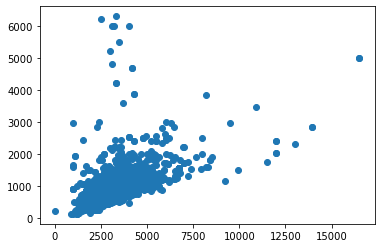

In [417]:
tempPrice=[]
tempArea=[]
for i in props:
    
    if i['Price']!='None' and i['Area']!='None' and i['Area']<8000:
        tempPrice.append(i['Price'])
        tempArea.append(i['Area'])
    #print(tempArea)
    
    
import matplotlib.pyplot as plt
plt.scatter(tempPrice,tempArea)
plt.show()

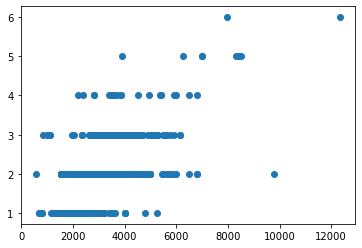

In [418]:
tempPrice=[]
tempBedrooms=[]

for i in props:
     if i['Price']!='None' and i['Bedrooms']!='None' and i['Baths']!='None' and i['Bedrooms']<7:
        tempPrice.append(i['Price'])
        tempBedrooms.append(i['Bedrooms'])
        
import matplotlib.pyplot as plt
plt.scatter(tempPrice,tempBedrooms)
plt.show()

{'Has Studio': 472274, '1 Bed': 2727842, '2 Bed': 3232165, '3 Bed': 1277257, '4 Bed': 472702, '5 Bed': 148629}
{'Has Studio': 225, '1 Bed': 1104, '2 Bed': 1057, '3 Bed': 305, '4 Bed': 88, '5 Bed': 24}


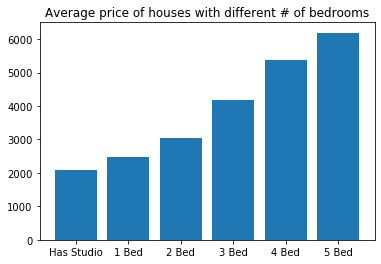

In [419]:
#might have to fork this later if the distn. over #beds change
#drastically.Might have to use brute force conditioning instead 
#of the dict. approach. 

bedDict={'Has Studio':0,'1 Bed':0,'2 Bed':0,'3 Bed':0,'4 Bed':0,'5 Bed':0}
bedCount={'Has Studio':0,'1 Bed':0,'2 Bed':0,'3 Bed':0,'4 Bed':0,'5 Bed':0}
matDict={1:'1 Bed',2:'2 Bed',3:'3 Bed',4:'4 Bed',5:'5 Bed'}

for i in props:
    if i['Bedrooms']!='None' and i['Bedrooms']<6:
        bedDict[matDict[i['Bedrooms']]]+=i['Price']
        bedCount[matDict[i['Bedrooms']]]+=1
    
    if i['Is Studio']=='Yes':
        bedDict['Has Studio']+=i['Price']
        bedCount['Has Studio']+=1
    
print(bedDict)
print(bedCount)

tempPrice=list(bedDict.values())
tempBed=list(bedCount.values())
tempCount=list(bedCount.keys())

for i in range(len(tempBed)):
    if tempBed[i]==0:
        tempBed.remove(tempBed[i])
        tempPrice.remove(tempPrice[i]) 
        tempCount.remove(temp2[i])
        break

temp=list(map(lambda tempPrice,tempCount:tempPrice/tempCount,tempPrice,tempBed))

plt.figure()
plt.bar(tempCount,temp)
plt.title('Average price of houses with different # of bedrooms')
plt.show()

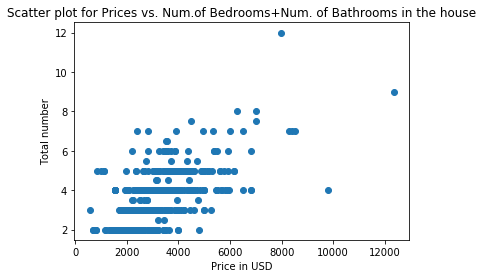

In [420]:
tempPrice=[]
tempBedrooms=[]
tempBathsBeds=[]

for i in props:
    if i['Price']!='None' and i['Bedrooms']!='None' and i['Baths']!='None' and i['Bedrooms']<7:
        tempPrice.append(i['Price'])
        tempBathsBeds.append(i['Baths']+i['Bedrooms'])
    
plt.scatter(tempPrice,tempBathsBeds)
plt.xlabel('Price in USD')
plt.ylabel('Total number')
plt.title('Scatter plot for Prices vs. Num.of Bedrooms+Num. of Bathrooms in the house')
plt.show()

In [421]:
tempPrice=[]
tempPriceWdKitchen=[]
tempPriceWdKitchenPet=[]

for i in props:
    tempPrice.append(i['Price'])
    if i['Kitchen attraction']!='NA':
        tempPriceWdKitchen.append(i['Price'])
    if i['Kitchen attraction']!='NA' and i['Pet friendly']!='NA':
        tempPriceWdKitchenPet.append(i['Price'])


In [422]:
import numpy as np

print(f'Average price of houses {np.mean(tempPrice)}')
print(f'Average price for a house with some kitchen attraction {np.mean(tempPriceWdKitchen)}')
print(f'Average price with some kitchen attraction and a pet friendly house {np.mean(tempPriceWdKitchenPet)}')

Average price of houses 2959.9234417344173
Average price for a house with some kitchen attraction 2655.253164556962
Average price with some kitchen attraction and a pet friendly house 2975.0


In [423]:
tempKitchen=[]
kitchenType={'Modern':0,'Upgraded':0,'LUX':0,'Deluxe':0,'Granite Island':0,'Maker Island':0}
countType={'Modern':0,'Upgraded':0,'LUX':0,'Deluxe':0,'Granite Island':0,'Maker Island':0}

for i in props:
    
    if i['Kitchen attraction'][0]=='Modern' or i['Kitchen attraction'][0]=='modern':
        kitchenType['Modern']+=i['Price']
        countType['Modern']+=1
        
    elif i['Kitchen attraction'][0]=='Upgraded' or i['Kitchen attraction'][0]=='upgraded':
        kitchenType['Upgraded']+=i['Price']
        countType['Upgraded']+=1
        
    elif i['Kitchen attraction'][0]=='Maker Island':
        kitchenType['Maker Island']+=i['Price']
        countType['Maker Island']+=1
        
    elif i['Kitchen attraction'][0]=='Deluxe' or i['Kitchen attraction'][0]=='deluxe':
        kitchenType['Deluxe']+=i['Price']
        countType['Deluxe']+=1
        
    elif i['Kitchen attraction'][0]=='Granite Island' or i['Kitchen attraction'][0]=='granite island':
        kitchenType['Granite Island']+=i['Price']
        countType['Granite Island']+=1
        
    elif i['Kitchen attraction'][0]=='LUX' or i['Kitchen attraction'][0]=='LUX':
        kitchenType['LUX']+=i['Price'] 
        countType['LUX']+=1
    
        
        
        


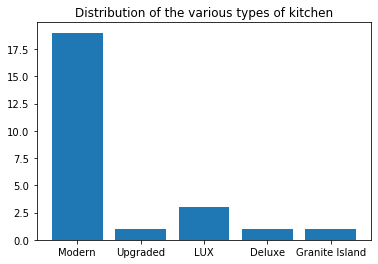

Text(0.5, 1.0, 'Distribution of average price of houses with different types of kitchens')

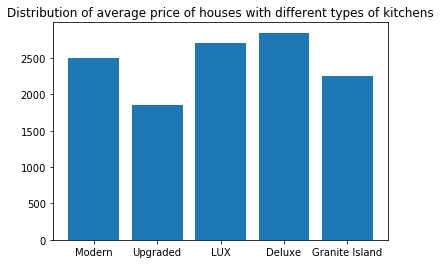

In [424]:
#for the total price of every kitchen
tempKitchen=list(kitchenType.values())

#for the count of differnet types of kitchen
tempCount=list((countType.values()))

#for the different types of kitchen
tempNames=list(kitchenType.keys())

for i in range(len(tempCount)):
    if tempCount[i]==0:
        tempCount.remove(tempCount[i])
        tempKitchen.remove(tempKitchen[i]) 
        tempNames.remove(tempNames[i])
        break
        
temp=map(lambda tempKitchen,tempCount:tempKitchen/tempCount,tempKitchen,tempCount)

#Frequency of the differnet types:
plt.figure()
plt.bar(tempNames,tempCount)
plt.title('Distribution of the various types of kitchen')
plt.show()

#Distribution of average price:
plt.figure()
plt.bar(tempNames,list(temp))
plt.title('Distribution of average price of houses with different types of kitchens')


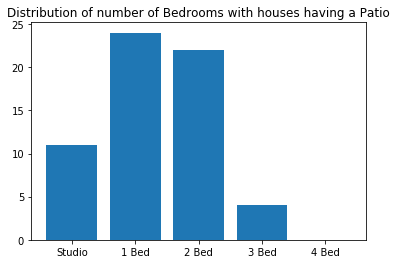

In [425]:
#Relationship between studio--kitchen attraction: 
#None are studio apartments hence #bedrooms are 'none'
#Might have to fork this later if the #beds in the ads change
#drastically.
#Brute force conditioning might turn out to be a better option later. 

matDict={'Has Studio':'Studio',1:'1 Bed',2:'2 Bed',3:'3 Bed',4:'4 Bed'}
bedDict={'Studio':0,'1 Bed':0,'2 Bed':0,'3 Bed':0,'4 Bed':0}

for i in props:
    if i['Patio']!='NA':
        if i['Bedrooms']=='None':
            bedDict['Studio']+=1
        else:
            temp=i['Bedrooms']
            bedDict[matDict[temp]]+=1
            
        
keys=list(bedDict.keys())
vals=list(bedDict.values())

plt.figure()
plt.bar(keys,vals)
plt.title('Distribution of number of Bedrooms with houses having a Patio')
plt.show()




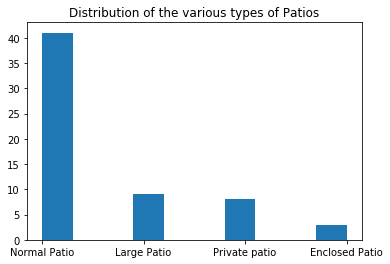

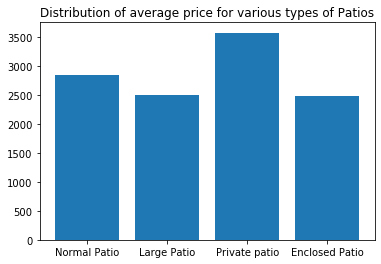

In [426]:
#All about Patios
#Fork this cell if it starts erroring because of the split
#Use separate conditions for the different names instead the
#current approach.
#Check after few days.

tempPatio=[]
tempLst=[]
matPatrn='\sa\s'

priceDict={'Normal Patio':0,'Large Patio':0,'Private patio':0,'Enclosed Patio':0}
countDict={'Normal Patio':0,'Large Patio':0,'Private patio':0,'Enclosed Patio':0}

for i in props:
    if i['Patio']!='NA':
        temp=i['Patio']
        
        if temp=='Has Patio':
            tempPatio.append('Normal Patio')
            priceDict['Normal Patio']+=i['Price']
            countDict['Normal Patio']+=1
        else:    
            tempLst=re.split(matPatrn,temp)
            priceDict[tempLst[1]]+=i['Price']
            countDict[tempLst[1]]+=1
            tempPatio.append(tempLst[1])
            
            
#Analyzing the counts:
temp=[]
tempCounts=list(countDict.values())
tempPrice=list(priceDict.values())
tempNames=list(priceDict.keys())

[temp.append(i) for i in range(len(tempCounts)) if tempCounts[i]==0]

for i in temp: 
    tempCounts.remove(tempCounts[i])
    tempPrice.remove(tempPrice[i])
    tempNames.remove(tempNames[i])
    
tempPrime=list(map(lambda tempCounts,tempPrice: tempPrice/tempCounts,tempCounts,tempPrice))


#Distribution of the frequency of occurences
plt.hist(tempPatio)
plt.title('Distribution of the various types of Patios')
plt.show()

#Distribution of the average price:
plt.bar(tempNames,tempPrime)
plt.title('Distribution of average price for various types of Patios')
plt.show()





    


In [391]:
temp=[13,14,15]
[temp.remove(i) for i in temp if i==13]

[None]

In [392]:
temp

[14, 15]